In [40]:
# Import Modules / Dependencies:

import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

import sqlalchemy
import psycopg2
from sqlalchemy import create_engine



In [3]:
# Create an engine to connect to the PostgreSQL Database:

engine = create_engine('postgresql://postgres:' + 'pwd' + '@localhost:5432/Homework')

In [4]:
# Use the engine to connect to the PostgreSQL Database:

connection = engine.connect()

In [5]:
# Load Table "departments" into a DataFrame:

departments_df = pd.read_sql("SELECT * FROM departments", connection)

In [6]:
# Load Table "Employees" into a DataFrame:

employees_df = pd.read_sql("SELECT * FROM employees", connection)

In [7]:
# Load Table "Salaries" into a DataFrame:

salaries_df = pd.read_sql("SELECT * FROM salaries", connection)

In [8]:
# Load Table "Titles" into a DataFrame:

titles_df = pd.read_sql("SELECT * FROM titles", connection)

In [12]:
salaries_df.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [15]:
print(salaries_df["salary"].min(), salaries_df["salary"].max())

40000 129492


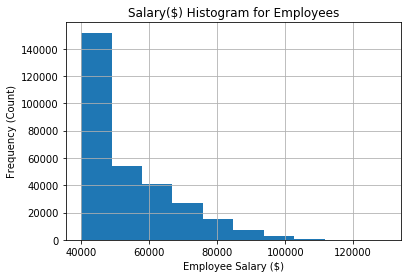

In [18]:
#Histogram for salaries
salaries_df.hist(column='salary')

plt.xlabel("Employee Salary ($)")

# Assign a label to the Y Axis:
plt.ylabel("Frequency (Count)")

# Assign a title to the Histogram:
plt.title("Salary($) Histogram for Employees")

# Save the Histogram:
plt.savefig("Output/HISTOGRAM_Salary.png")

# Display the Histogram:
plt.show()

In [20]:
#Average Salary by titles
combined_salary_title = pd.merge(titles_df, salaries_df, on = 'emp_no', how = "left")
combined_salary_title.head()

,emp_no,title,from_date_x,to_date_x,salary,from_date_y,to_date_y
0,10001,Senior Engineer,1986-06-26,9999-01-01,60117,1986-06-26,1987-06-26
1,10002,Staff,1996-08-03,9999-01-01,65828,1996-08-03,1997-08-03
2,10003,Senior Engineer,1995-12-03,9999-01-01,40006,1995-12-03,1996-12-02
3,10004,Engineer,1986-12-01,1995-12-01,40054,1986-12-01,1987-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01,40054,1986-12-01,1987-12-01


In [70]:
#Get relevant columns
combined_salary_title[["title","salary"]]

x_axis = combined_salary_title["title"]
y_axis = combined_salary_title["salary"]


,title,salary
0,Senior Engineer,60117
1,Staff,65828
2,Senior Engineer,40006
3,Engineer,40054
4,Senior Engineer,40054
...,...,...
443303,Engineer,49597
443304,Senior Engineer,49597
443305,Senior Staff,40000
443306,Staff,40000


([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

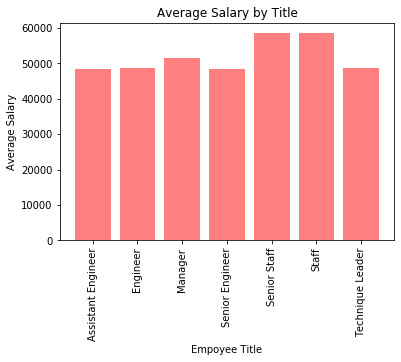

In [88]:

plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")

 # Give our chart some labels and a tile
plt.title("Average Salary by Title")
plt.xlabel("Empoyee Title")
plt.ylabel("Average Salary")
plt.xticks(rotation= 90 )

In [ ]:
#Conclusions

#This datasets looks fictitous
#Average salary of  Assistant engineer and Engineer is same which is not possible
#Average salary of Senior Staff and Staff is same which is not possible